# Netflix dataset EDA

## Angelos Nikolas

### The dataset is available at: https://www.kaggle.com/datasets/shivamb/netflix-shows

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset and changing the data format

In [2]:
#Reading the data from the csv file and changing the date format
dataset = pd.read_csv('netflix_titles.csv', date_parser=["date_added"], infer_datetime_format=True)
dataset["date_added"] = pd.to_datetime(dataset["date_added"].str.strip(), format="%B %d, %Y")
dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Basic data exploration with pandas
### Checking the data types of each column

In [3]:
dataset.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

### Summarizing the dataset

In [4]:
# Summarize the dataset (taking the numerical columns)
dataset.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Date analysis

<AxesSubplot:>

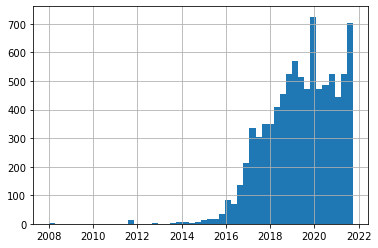

In [5]:
 # Create a histogram of the date_added column (matplotlib)
dataset["date_added"].hist(bins=50)

In [6]:
# Create a histogram of the release_year column (plotly)
px.histogram(dataset, x="release_year", title="Release Year Histogram", labels={"release_year": "Release Year"}, height=600, width=800)

<AxesSubplot:>

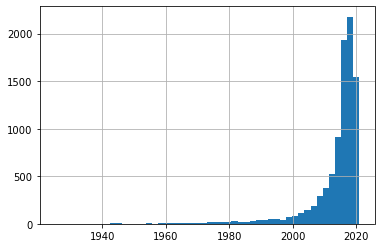

In [7]:
#Create a histogram of the release_year column(matplotlib)
dataset["release_year"].hist(bins=50) 

In [8]:
# Create a histogram of the release_year column (plotly)
px.histogram(dataset, x="date_added", title="Date added to Netflix Histogram", labels={"date_added": "Date Added"}, height=600, width=800, color="type")

In [9]:
# Check only what title was released in the year 1925 and the decription of the title
dataset[dataset["release_year"] == 1925]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


In [10]:
# Extract month from the date_added column
dataset["added_month"] = dataset["date_added"].dt.month.fillna(0)
dataset["added_day"] = dataset["date_added"].dt.day.fillna(0)

In [11]:
px.histogram(dataset, x="added_month", title="Month added to Netflix Histogram", labels={"added_month": "Month Added"}, height=600, width=800, color="type")

In [12]:
px.histogram(dataset, x="added_day", title="Day added to Netflix Histogram", labels={"added_day": "Day Added"}, height=600, width=800, color="type") # Netflix added titles to the database on a daily basis and first of each month had the most titles added

### Sentiment Analysis with textblob

In [13]:
#Cheecking the 5 first rows of the description column
# The description column can be used for sentiment analysis
from textblob import TextBlob
dataset["description"].head()

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

In [14]:
#natural language processing
# Create a function to return the sentiment of the description column
def sentiment_analysis(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity == 0:
        return "neutral"
    else:
        return "negative"

In [15]:
# Change the character lenght of the description column to a maximum of 200 characters
pd.options.display.max_colwidth = 200
dataset["description"].head()

0    As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.
1         After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.
2          To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.
3         Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.
4    In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.
Name: description, dtype: object

In [16]:
# Create a column called sentiment with the sentiment analysis of the description column
dataset["sentiment"] = dataset["description"].apply(sentiment_analysis)
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day,sentiment
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.",9.0,25.0,positive
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Ma...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.",9.0,24.0,neutral
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.",9.0,24.0,negative
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.",9.0,24.0,negative
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.",9.0,24.0,neutral


In [17]:
#Passing a description to the sentiment analysis function
sentiment_analysis("In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.")

'neutral'

<AxesSubplot:title={'center':'Sentiment Analysis'}, ylabel='sentiment'>

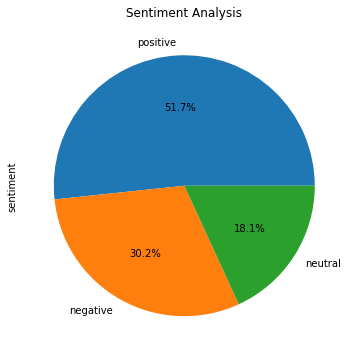

In [18]:
# Create a pie chart of the sentiment column
dataset.sentiment.value_counts().plot(kind="pie", autopct="%1.1f%%" , figsize=(6,6), title="Sentiment Analysis")



### K-means clustering based on the added month & day

In [19]:
#Apply k-means clustering to the dataset
from sklearn.cluster import KMeans
#apply k-means clustering to the dataset
kmeans = KMeans(n_clusters=5, random_state=0).fit(dataset[["added_month", "added_day"]])
# Add a column to the dataset called cluster
dataset["cluster"] = kmeans.labels_ 

<AxesSubplot:title={'center':'Clusters'}, ylabel='cluster'>

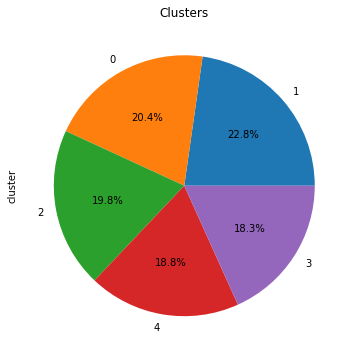

In [20]:
#plot the clusters
dataset.cluster.value_counts().plot(kind="pie", autopct="%1.1f%%" , figsize=(6,6), title="Clusters")

<AxesSubplot:xlabel='added_month', ylabel='added_day'>

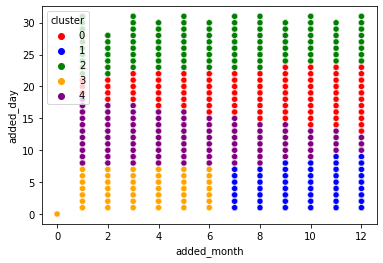

In [21]:
# Create a scatter plot of the added_month and added_day columns
sns.scatterplot(x="added_month", y="added_day", data=dataset, hue="cluster", palette=["red", "blue", "green", "orange", "purple"])

### Bonus EDA and functions

<AxesSubplot:>

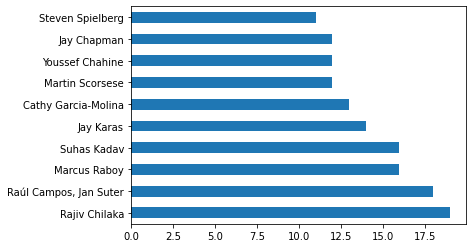

In [22]:
# plot the top 10 directors appearing in multiple titles
dataset.director.value_counts()[dataset.director.value_counts() > 1].head(10).plot(kind="barh")

In [23]:
#find the number of movies based on release year
def find_num_movies(dataset):
    num_movies = dataset.groupby('release_year').size()
    return num_movies



In [24]:
find_num_movies(dataset)

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Length: 74, dtype: int64

In [25]:
#function to input the director name and return a list of movies
def find_movies(dataset, director):
    movies = dataset[dataset.director == director]
    return movies

In [26]:
find_movies(dataset, "Steven Spielberg")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_day,sentiment,cluster
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, Lorraine Gary, Murray Hamilton, Carl Gottlieb, Jeffrey Kramer, Susan Backlinie, Jonathan Filley, Ted Grossman",United States,2021-09-16,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas","When an insatiable great white shark terrorizes Amity Island, a police chief, an oceanographer and a grizzled shark hunter seek to destroy the beast.",9.0,16.0,positive,0
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walken, Martin Sheen, Nathalie Baye, Amy Adams, James Brolin, Brian Howe, Frank John Hughes, Steve Eastin","United States, Canada",2021-08-01,2002,PG-13,142 min,Dramas,"An FBI agent makes it his mission to put cunning con man Frank Abagnale Jr. behind bars. But Frank not only eludes capture, he revels in the pursuit.",8.0,1.0,negative,1
1203,s1204,Movie,The BFG,Steven Spielberg,"Mark Rylance, Ruby Barnhill, Penelope Wilton, Jemaine Clement, Rebecca Hall, Rafe Spall, Bill Hader, Ólafur Darri Ólafsson, Adam Godley, Michael Adamthwaite, Daniel Bacon, Jonathan Holmes, Chris G...","United States, India, United Kingdom",2021-03-15,2016,PG,118 min,"Children & Family Movies, Dramas",A little orphan meets up with a kind giant who's supposed to eat her but instead protects her from some truly horrible giants who terrorize them both.,3.0,15.0,negative,4
7070,s7071,Movie,Indiana Jones and the Kingdom of the Crystal Skull,Steven Spielberg,"Harrison Ford, Cate Blanchett, Karen Allen, Ray Winstone, John Hurt, Jim Broadbent, Igor Jijikine, Shia LaBeouf",United States,2019-01-01,2008,PG-13,123 min,"Action & Adventure, Children & Family Movies, Sci-Fi & Fantasy","Indiana Jones is drawn into a Russian plot to unearth the Crystal Skulls of Akator, Amazonian artifacts with supernatural powers.",1.0,1.0,positive,3
7071,s7072,Movie,Indiana Jones and the Last Crusade,Steven Spielberg,"Harrison Ford, Sean Connery, Denholm Elliott, Alison Doody, John Rhys-Davies, Julian Glover, River Phoenix, Michael Byrne, Kevork Malikyan, Robert Eddison",United States,2019-01-01,1989,PG-13,127 min,"Action & Adventure, Children & Family Movies, Classic Movies","Accompanied by his father, Indiana Jones sets off on his third adventure to explore the cradle of civilization on a perilous hunt for the Holy Grail.",1.0,1.0,neutral,3
7072,s7073,Movie,Indiana Jones and the Raiders of the Lost Ark,Steven Spielberg,"Harrison Ford, Karen Allen, Paul Freeman, Ronald Lacey, John Rhys-Davies, Denholm Elliott, Alfred Molina, Wolf Kahler, Anthony Higgins, Vic Tablian",United States,2019-01-01,1981,PG,116 min,"Action & Adventure, Children & Family Movies, Classic Movies","When Indiana Jones is hired by the government to locate the legendary Ark of the Covenant, he finds himself up against the entire Nazi regime.",1.0,1.0,positive,3
7073,s7074,Movie,Indiana Jones and the Temple of Doom,Steven Spielberg,"Harrison Ford, Kate Capshaw, Amrish Puri, Roshan Seth, Philip Stone, Roy Chiao, Jonathan Ke Quan, David Yip, Ric Young, Chua Kah Joo",United States,2019-01-01,1984,PG,119 min,"Action & Adventure, Children & Family Movies, Classic Movies","Indiana Jones, his young sidekick and a spoiled songbird get more than they bargained for when they go to India in search of a missing magical stone.",1.0,1.0,positive,3
7308,s7309,Movie,Lincoln,Steven Spielberg,"Daniel Day-Lewis, Sally Field, David Strathairn, Joseph Gordon-Levitt, James Spader, Hal Holbrook, Tommy Lee Jones, Jackie Earle Haley, John Hawkes, Jared Harris, Joseph Cross, Tim Blake Nelson, D...","United States, India",2018-02-21,2012,PG-13,150 min,Dramas,"Director Steven Spielberg takes on the towering legacy of Abraham Lincoln, focusing on his stewardship of the Union during the Civil War years.",2.0,21.0,neutral,0
7957,s7958,Movie,Schindler's List,Steven Spiel

In [27]:
#function to input the title and return the duration of the movie
def find_duration(dataset, title):
    duration = dataset[dataset.title == title].duration
    return duration

In [28]:
#Input the title and return the duration
find_duration(dataset, "Ganglands")

2    1 Season
Name: duration, dtype: object